# **Library import**

In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

2021-12-16 18:14:34.132164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2021-12-16 18:14:36.936063: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-16 18:14:36.937900: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-16 18:14:37.137291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 18:14:37.143958: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX250 computeCapability: 6.1
coreClock: 1.582GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 44.76GiB/s
2021-12-16 18:14:37.144057: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-12-16 18:14:37.147870: I tensorflow/stream_executor/platform/default/dso_lo

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

t/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-12-16 18:14:37.150574: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2021-12-16 18:14:37.151049: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so.10
2021-12-16 18:14:37.154906: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusolver.so.10
2021-12-16 18:14:37.156305: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusparse.so.11
2021-12-16 18:14:37.156824: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-12-16 18:14:37.157191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning 

# **Data**

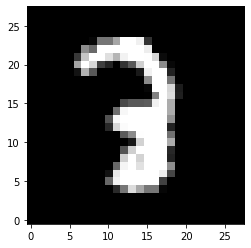

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(X_train[10], cmap="gray", origin="lower");

# **Compile & Fit Model**

In [4]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2021-12-16 18:16:17.728637: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-16 18:16:17.728930: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-16 18:16:17.729111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 18:16:17.740475: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX250 computeCapability: 6.1
coreClock: 1.582GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 44.76GiB/s
2021-12-16 18:16:17.74068

In [5]:
history = model.fit(X_train, y_train, batch_size=16, epochs=5)

2021-12-16 18:16:24.921324: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-16 18:16:24.946669: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Epoch 1/5


2021-12-16 18:16:25.806414: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


  49/3750 [..............................] - ETA: 12s - loss: 114.8504 - accuracy: 0.1711 

2021-12-16 18:16:26.294713: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


3750/3750 [==============================] - 13s 3ms/step - loss: 16.4751 - accuracy: 0.7308
Epoch 2/5
3750/3750 [==============================] - 12s 3ms/step - loss: 1.7939 - accuracy: 0.9196
Epoch 3/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.9470 - accuracy: 0.9417
Epoch 4/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.5702 - accuracy: 0.9547
Epoch 5/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3749 - accuracy: 0.9646


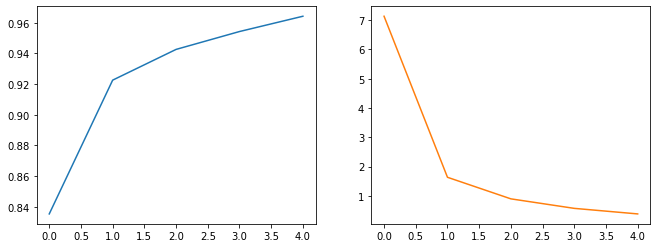

In [6]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'], c="C1");

# **Callbacks**

https://keras.io/api/callbacks/

In [7]:
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau

# **Tensorboard**

https://keras.io/api/callbacks/tensorboard/

https://www.tensorflow.org/tensorboard

In [ ]:
!tensorboard --logdir logs

In [8]:
callbacks = [TensorBoard(log_dir="logs/pokus_1", update_freq="epoch")] #, update_freq="batch"

2021-12-16 18:26:28.171407: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-12-16 18:26:28.171466: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-12-16 18:26:28.171501: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2021-12-16 18:26:28.171737: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcupti.so.11.0'; dlerror: libcupti.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/plsek/anaconda3/envs/ciao/heasoft-6.28/x86_64-pc-linux-gnu-libc2.31/lib::/home/plsek/anaconda3/envs/ciao/SPEX-3.06.00/lib
2021-12-16 18:26:28.172443: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so
2021-12-16 18:26:28.272908: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_

In [9]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size=16, epochs=15,
          callbacks=callbacks)

Epoch 1/15
  53/3750 [..............................] - ETA: 14s - loss: 74.5014 - accuracy: 0.3233   

2021-12-16 18:26:45.025174: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-12-16 18:26:45.025219: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-12-16 18:26:45.026387: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2021-12-16 18:26:45.032465: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-12-16 18:26:45.033883: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-12-16 18:26:45.035189: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-12-16 18:26:45.037792: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/pokus_1/train/plugins/profile/2021_12

3750/3750 [==============================] - 15s 4ms/step - loss: 6.4708 - accuracy: 0.8165 - val_loss: 0.5045 - val_accuracy: 0.8726
Epoch 2/15
3750/3750 [==============================] - 13s 4ms/step - loss: 0.3773 - accuracy: 0.9032 - val_loss: 0.3323 - val_accuracy: 0.9163
Epoch 3/15
3750/3750 [==============================] - 13s 3ms/step - loss: 0.3140 - accuracy: 0.9195 - val_loss: 0.3898 - val_accuracy: 0.8743
Epoch 4/15
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3026 - accuracy: 0.9260 - val_loss: 0.3415 - val_accuracy: 0.9224
Epoch 5/15
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2804 - accuracy: 0.9313 - val_loss: 0.3133 - val_accuracy: 0.9376
Epoch 6/15
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2572 - accuracy: 0.9373 - val_loss: 0.3764 - val_accuracy: 0.9256
Epoch 7/15
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2628 - accuracy: 0.9385 - val_loss: 0.3029 - val_accuracy: 0.9

# **Reduce learning rate**

https://keras.io/api/callbacks/reduce_lr_on_plateau/

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

In [10]:
callbacks = [TensorBoard(log_dir="logs/pokus_2", update_freq="epoch"),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,
                               min_lr=0.0, mode="min", verbose=1)]

2021-12-16 18:30:20.525808: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-12-16 18:30:20.525942: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-12-16 18:30:20.526171: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-12-16 18:30:20.526268: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [11]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size=16, epochs=15,
          callbacks=callbacks)

Epoch 1/15
  32/3750 [..............................] - ETA: 20s - loss: 84.9085 - accuracy: 0.3070    

2021-12-16 18:30:25.302076: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-12-16 18:30:25.302127: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-12-16 18:30:25.302229: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-12-16 18:30:25.342018: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-12-16 18:30:25.343184: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-12-16 18:30:25.344166: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-12-16 18:30:25.345854: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/pokus_2/train/plugins/profile/2021_12_16_18_3

3750/3750 [==============================] - 15s 4ms/step - loss: 6.4894 - accuracy: 0.8153 - val_loss: 0.4594 - val_accuracy: 0.8917
Epoch 2/15
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4102 - accuracy: 0.9032 - val_loss: 0.3541 - val_accuracy: 0.9188
Epoch 3/15
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3470 - accuracy: 0.9145 - val_loss: 0.3197 - val_accuracy: 0.9254
Epoch 4/15
3750/3750 [==============================] - 13s 3ms/step - loss: 0.2784 - accuracy: 0.9325 - val_loss: 0.3429 - val_accuracy: 0.9274
Epoch 5/15
3750/3750 [==============================] - 13s 3ms/step - loss: 0.2709 - accuracy: 0.9353 - val_loss: 0.3186 - val_accuracy: 0.9282
Epoch 6/15
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2639 - accuracy: 0.9396 - val_loss: 0.3046 - val_accuracy: 0.9375
Epoch 7/15
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2669 - accuracy: 0.9413 - val_loss: 0.3428 - val_accuracy: 0.9

# **Images**

https://www.tensorflow.org/tensorboard/image_summaries

In [12]:
from tensorflow.summary import create_file_writer, scalar

In [13]:
def plot(img, pred):
    fig = plt.figure(figsize=(5,5))
    plt.title(pred)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    return fig

def plot_to_image(figure):
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    image = tf.expand_dims(image, 0)
    return image

In [14]:
logdir = "logs/images"
with create_file_writer(logdir).as_default():
    for i, img in enumerate(X_test[0:10]):
        y_pred = model.predict(img.reshape(-1,28,28,1))
        y_pred = np.argmax(y_pred)
        
        tf.summary.image("10 training data examples", 
                         plot_to_image(plot(img, y_pred)), max_outputs=25, step=i)

## **only wrong images**

In [15]:
def plot(img, pred, true):
    fig = plt.figure(figsize=(5,5))
    plt.title(f"{pred} (true {true})")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    return fig

logdir = "logs/images_wrong"

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
wrong = (y_pred == y_test) == False

with create_file_writer(logdir).as_default():
    for i, pred, true, img in zip(range(10), 
                                  y_pred[wrong][:10], 
                                  y_test[wrong][:10], 
                                  X_test[wrong][:10]):
        tf.summary.image("10 mistakenly classified images", 
                         plot_to_image(plot(img, pred, true)), max_outputs=25, step=i)

# **HyperParams**

In [16]:
def get_model(neurons, learning_rate):
    model = Sequential()
    model.add(Flatten())
    
    #for i in range(layers):
    model.add(Dense(neurons, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [17]:
from tensorboard.plugins.hparams import api as hp

neurons = hp.HParam('num_units', hp.Discrete([64, 128, 256]))
learning_rate = hp.HParam('learning_rate', hp.Discrete([1e-3, 1e-4, 1e-5]))
batchsize = hp.HParam('batch_size', hp.Discrete([8, 16]))

In [18]:
with create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(hparams=[neurons, learning_rate, batchsize],
                      metrics=[hp.Metric('accuracy', display_name='Accuracy')])

In [19]:
def train_test_model(hparams):
    model = get_model(hparams[neurons], hparams[learning_rate])

    name = "hp_{0}_{1}_{2}".format(hparams[neurons], hparams[learning_rate], hparams[batchsize])
    logdir = "logs/hparam_tuning/" + name
    
    callbacks = [TensorBoard(log_dir=logdir, update_freq="epoch")]
    
    model.fit(X_train, y_train, batch_size=hparams[batchsize], epochs=5, callbacks=callbacks)
    _, accuracy = model.evaluate(X_test, y_test)

    return accuracy

def run(run_dir, hparams):
    with create_file_writer(run_dir).as_default():
        hp.hparams(hparams)
        accuracy = train_test_model(hparams)
        scalar("accuracy", accuracy, step=1)

In [20]:
session_num = 0

for N in neurons.domain.values:
    for BS in batchsize.domain.values:
        for LR in learning_rate.domain.values:
            hparams = {neurons : N,
                       learning_rate : LR,
                       batchsize: BS}
            
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run('logs/hparam_tuning/' + run_name, hparams)
            session_num += 1

--- Starting trial: run-0
{'num_units': 64, 'learning_rate': 1e-05, 'batch_size': 8}
Epoch 1/5


2021-12-16 18:46:42.094037: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-12-16 18:46:42.094079: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-12-16 18:46:42.094152: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-12-16 18:46:42.094176: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


  30/7500 [..............................] - ETA: 49s - loss: 172.5625 - accuracy: 0.0724 

2021-12-16 18:46:43.014633: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-12-16 18:46:43.014697: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-12-16 18:46:43.014821: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-12-16 18:46:43.064691: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-12-16 18:46:43.065727: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-12-16 18:46:43.066376: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-12-16 18:46:43.067512: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/hparam_tuning/hp_64_1e-05_8/train/plugins/pro

7500/7500 [==============================] - 28s 4ms/step - loss: 55.8112 - accuracy: 0.3572
Epoch 2/5
7500/7500 [==============================] - 26s 3ms/step - loss: 8.2987 - accuracy: 0.7648
Epoch 3/5
7500/7500 [==============================] - 26s 3ms/step - loss: 5.4024 - accuracy: 0.8241
Epoch 4/5
7500/7500 [==============================] - 26s 3ms/step - loss: 3.9782 - accuracy: 0.8520
Epoch 5/5
 271/7500 [>.............................] - ETA: 26s - loss: 3.5705 - accuracy: 0.8632

KeyboardInterrupt: 

# **Tensorboard inline**

In [22]:
%load_ext tensorboard

In [23]:
%tensorboard --logdir logs/

# **Tensorboard dev**

https://tensorboard.dev/

In [24]:
!tensorboard dev upload --logdir logs --name "MNIST Digits"

2021-12-16 18:58:07.909264: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/05yx3Mn2TXKqbiE1LwqSWQ/

[2021-12-16T18:58:11] Started scanning logdir.
[2021-12-16T18:58:29] Total uploaded: 198 scalars, 19 tensors (114 B), 18 binary objects (532.2 kB)
^C2KListening for new data in logdir...


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/05yx3Mn2TXKqbiE1LwqSWQ/


In [25]:
!tensorboard dev delete --experiment_id 05yx3Mn2TXKqbiE1LwqSWQ

2021-12-16 19:00:38.052679: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Deleted experiment 05yx3Mn2TXKqbiE1LwqSWQ.
